In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

# <font color=firebrick size=10 > <b> <center> <u> Résultats de l'algorithme </u> </center> </b> </font>

<i> <font color=slateblue> Voulant tester, puis <b> voir jusqu'où pouvait aller </b> , l'algorithme DQN implémenté pour ce rapport, j'ai emprunté l'ancien ordinateur de Ales Brahiti (M2 FES) que je remercie vivement. </font> </i>

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

plt.style.use('ggplot')

## <font size=5> <u> Deep $Q$-Learning </u> </font>

In [3]:
scores=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 4, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 4, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 0, 0, 3, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 3, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0, 4, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 2, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 2, 1, 2, 1, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 1, 1, 1, 1, 2, 3, 2, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 3, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1, 2, 3, 0, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 3, 2, 3, 1, 4, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 3, 0, 2, 1, 1, 3, 3, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 1, 3, 1, 1, 1, 0, 0, 0, 1, 2, 0, 1, 1, 0, 2, 1, 4, 0, 2, 1, 4, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2, 3, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 3, 2, 1, 2, 1, 0, 1, 3, 2, 3, 1, 1, 0, 1, 2, 0, 0, 3, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1, 2, 0, 0, 1, 0, 3, 0, 3, 0, 0, 3, 0, 2, 2, 1, 1, 1, 1, 1, 0, 0, 2, 1, 2, 1, 3, 2, 1, 2, 2, 0, 0, 0, 3, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 5, 2, 1, 1, 2, 2, 1, 3, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 3, 3, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 3, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 4, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 1, 3, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 2, 2, 1, 0, 0, 0, 1, 1, 5, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 3, 0, 1, 0, 1, 1, 2, 3, 2, 1, 1, 2, 1, 3, 0, 1, 0, 0, 0, 0, 1, 1, 2, 1, 2, 2, 2, 4, 2, 1, 1, 1, 0, 1, 1, 1, 3, 1, 5, 3, 2, 0, 0, 3, 1, 2, 1, 1, 0, 1, 2, 1, 0, 1, 3, 1, 1, 3, 1, 1, 1, 1, 0, 2, 3, 3, 1, 1, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2, 1, 1, 2, 3, 0, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 3, 1, 1, 2, 0, 0, 0, 1, 1, 1, 4, 3, 2, 2, 1, 3, 0, 2, 0, 1, 1, 2, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 4, 3, 1, 0, 2, 1, 1, 3, 1, 2, 1, 3, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 3, 0, 0, 1, 0, 0, 1, 2, 2, 3, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 2, 1, 4, 2, 1, 2, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 4, 2, 1, 2, 1, 0, 0, 3, 1, 1, 1, 1, 2, 2, 3, 1, 1, 1, 1, 5, 1, 0, 1, 0, 2, 2, 1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 3, 2, 3, 1, 2, 1, 1, 3, 1, 3, 4, 2, 1, 1, 2, 3, 0, 1, 1, 1, 2, 4, 1, 1, 4, 1, 2, 2, 0, 0, 0, 0, 1, 2, 1, 2, 0, 2, 1, 1, 1, 0, 0, 0, 4, 0, 1, 2, 3, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 4, 0, 1, 1, 2, 1, 1, 1, 3, 2, 2, 1, 2, 2, 1, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 5, 1, 3, 2, 3, 1, 2, 2, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 3, 2, 1, 2, 0, 2, 4, 1, 1, 0, 0, 2, 1, 1, 2, 2, 1, 1, 1, 3, 3, 1, 2, 0, 0, 3, 1, 3, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 4, 3, 1, 2, 3, 0, 2, 1, 2, 1, 2, 2, 1, 2, 2, 3, 1, 2, 2, 1, 3, 5, 0, 3, 1, 2, 1, 2, 1, 1, 1, 2, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 2, 2, 1, 1, 1, 0, 2, 2, 5, 2, 0, 0, 1, 0, 3, 3, 1, 2, 3, 1, 2, 1, 2, 2, 1, 1, 0, 0, 2, 3, 2, 3, 4, 0, 1, 1, 1, 2, 1, 1, 3, 2, 2, 2, 1, 1, 3, 2, 3, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 4, 3, 1, 2, 1, 1, 3, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 4, 2, 2, 4, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 3, 1, 4, 1, 2, 4, 1, 2, 3, 1, 2, 1, 1, 2, 0, 2, 3, 2, 2, 2, 1, 1, 3, 0, 1, 2, 2, 1, 1, 2, 2, 4, 1, 3, 4, 4, 2, 1, 3, 0, 1, 0, 0, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 3, 2, 6, 1, 2, 1, 1, 1, 4, 3, 2, 0, 0, 1, 2, 7, 1, 3, 2, 1, 2, 2, 2, 1, 2, 2, 0, 0, 4, 0, 0, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 2, 3, 4, 3, 2, 2, 4, 2, 2, 2, 2, 4, 1, 2, 3, 2, 1, 2, 1, 2, 3, 1, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 2, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 3, 1, 1, 3, 2, 2, 1, 1, 2, 5, 2, 3, 1, 2, 2, 0, 1, 6, 2, 1, 2, 1, 2, 3, 1, 1, 0, 3, 1, 5, 1, 1, 2, 2, 1, 1, 0, 4, 2, 1, 3, 1, 1, 1, 1, 1, 3, 4, 2, 1, 1, 0, 1, 3, 0, 2, 1, 2, 0, 0, 0, 4, 2, 2, 1, 3, 3, 4, 1, 2, 2, 2, 1, 1, 2, 6, 3, 0, 0, 0, 2, 3, 1, 0, 0, 3, 1, 2, 1, 6, 3, 1, 5, 1, 1, 5, 1, 1, 4, 2, 1, 1, 3, 2, 3, 4, 1, 2, 0, 1, 3, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 6, 4, 5, 3, 1, 1, 3, 1, 5, 1, 0, 0, 1, 2, 2, 2, 2, 1, 1, 3, 2, 4, 6, 2, 1, 3, 2, 3, 4, 1, 4, 3, 1, 1, 3, 0, 1, 1, 3, 1, 1, 2, 4, 1, 3, 4, 1, 4, 3, 3, 1, 1, 1, 2, 2, 0, 1, 2, 1, 3, 2, 2, 1, 1, 5, 3, 4, 1, 2, 2, 0, 3, 1, 1, 1, 1, 3, 2, 2, 3, 7, 1, 0, 1, 1, 2, 1, 4, 1, 3, 1, 3, 1, 4, 2, 1, 2, 1, 4, 1, 1, 1, 2, 2, 3, 4, 1, 1, 1, 1, 2, 1, 5, 2, 4, 2, 1, 2, 2, 6, 1, 1, 5, 3, 2, 2, 2, 1, 5, 2, 3, 1, 1, 2, 3, 1, 3, 4, 2, 1, 2, 1, 1, 1, 4, 1, 6, 3, 1, 1, 1, 3, 2, 0, 2, 2, 2, 1, 4, 2, 1, 2, 4, 1, 2, 2, 1, 4, 1, 1, 3, 1, 2, 1, 1, 3, 2, 3, 2, 0, 1, 3, 1, 2, 2, 2, 4, 4, 2, 2, 1, 3, 1, 1, 1, 4, 1, 3, 0, 2, 2, 2, 3, 0, 0, 0, 2, 1, 2, 1, 1, 3, 2, 3, 3, 2, 2, 1, 2, 1, 2, 5, 1, 1, 2, 3, 1, 2, 3, 3, 0, 3, 0, 0, 0, 3, 1, 3, 2, 1, 2, 1, 1, 1, 3, 3, 7, 3, 1, 3, 2, 2, 6, 1, 5, 1, 1, 2, 5, 1, 1, 3, 2, 1, 1, 2, 1, 2, 2, 2, 3, 1, 3, 4, 1, 4, 3, 2, 2, 2, 1, 3, 3, 3, 1, 4, 2, 1, 1, 1, 5, 1, 3, 4, 3, 1, 2, 1, 4, 1, 4, 2, 4, 5, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 4, 1, 2, 3, 4, 1, 0, 1, 2, 2, 1, 2, 3, 2, 1, 2, 2, 4, 2, 0, 3, 5, 3, 1, 1, 3, 4, 0, 0, 1, 3, 2, 3, 1, 3, 0, 1, 1, 1, 2, 3, 4, 1, 3, 6, 1, 3, 3, 3, 3, 6, 0, 6, 3, 2, 3, 2, 2, 1, 3, 2, 1, 1, 1, 1, 4, 2, 1, 4, 4, 1, 0, 1, 3, 2, 1, 1, 1, 1, 0, 2, 5, 1, 5, 2, 2, 1, 1, 3, 7, 4, 3, 1, 6, 2, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 5, 1, 1, 2, 2, 3, 6, 4, 2, 4, 2, 1, 2, 2, 5, 5, 0, 5, 9, 5, 2, 3, 4, 2, 2, 1, 1, 3, 5, 4, 6, 1, 2, 3, 0, 4, 0, 4, 1, 3, 1, 1, 5, 1, 2, 0, 2, 3, 1, 1, 2, 3, 1, 2, 6, 2, 2, 3, 5, 3, 3, 1, 1, 2, 0, 1, 2, 2, 3, 1, 3, 2, 2, 3, 8, 1, 3, 2, 4, 3, 3, 1, 3, 2, 2, 4, 1, 2, 1, 3, 4, 2, 2, 1, 0, 0, 2, 1, 3, 2, 2, 1, 2, 1, 2, 0, 1, 2, 1, 3, 2, 1, 2, 4, 1, 1, 4, 1, 2, 3, 3, 1, 3, 0, 4, 6, 3, 3, 5, 2, 1, 5, 1, 2, 4, 1, 8, 4, 2, 3, 1, 3, 1, 2, 4, 1, 2, 1, 4, 2, 3, 1, 4, 6, 2, 1, 3, 1, 2, 3, 4, 2, 5, 2, 6, 5, 5, 1, 3, 2, 1, 0, 0, 0, 5, 2, 2, 5, 1, 5, 4, 2, 5, 4, 2, 5, 1, 1, 4, 1, 2, 1, 1, 3, 5, 1, 3, 1, 2, 2, 1, 3, 1, 3, 4, 2, 5, 2, 4, 5, 5, 2, 8, 7, 1, 1, 3, 4, 2, 2, 1, 5, 4, 3, 2, 1, 7, 1, 2, 2, 5, 1, 1, 2, 2, 3, 3, 3, 4, 5, 1, 7, 1, 1, 2, 5, 2, 3, 1, 4, 2, 2, 1, 2, 1, 3, 3, 3, 1, 2, 3, 6, 1, 6, 3, 1, 5, 4, 3, 2, 1, 2, 5, 5, 3, 1, 8, 1, 4, 1, 3, 2, 2, 2, 0, 2, 1, 1, 4, 2, 2, 5, 3, 1, 2, 0, 0, 1, 1, 3, 5, 2, 2, 1, 1, 1, 1, 1, 2, 1, 7, 6, 7, 2, 1, 2, 1, 2, 6, 3, 1, 7, 6, 3, 2, 0, 2, 1, 2, 2, 5, 1, 2, 4, 1, 1, 2, 4, 2, 4, 2, 2, 1, 4, 1, 4, 4, 2, 2, 1, 2, 4, 3, 3, 1, 4, 3, 3, 1, 2, 2, 1, 2, 0, 1, 0, 0, 0, 2, 3, 0, 1, 4, 6, 3, 4, 3, 6, 2, 0, 2, 2, 1, 1, 5, 4, 0, 1, 4, 1, 2, 3, 2, 5, 1, 1, 2, 4, 4, 6, 2, 4, 4, 4, 1, 1, 1, 2, 2, 3, 1, 4, 4, 1, 2, 4, 1, 3, 1, 1, 1, 4, 1, 4, 7, 3, 1, 2, 6, 7, 2, 5, 1, 3, 2, 3, 2, 3, 1, 6, 4, 6, 5, 1, 2, 1, 3, 1, 2, 2, 2, 2, 1, 4, 2, 4, 2, 1, 1, 2, 4, 2, 1, 4, 3, 3, 2, 1, 5, 0, 3, 6, 4, 2, 1, 1, 2, 2, 1, 1, 3, 1, 4, 1, 3, 4, 1, 2, 2, 8, 1, 1, 2, 2, 1, 6, 6, 1, 3, 2, 1, 1, 4, 2, 3, 1, 1, 2, 3, 6, 5, 0, 2, 3, 4, 0, 2, 2, 3, 3, 5, 2, 3, 4, 3, 9, 4, 4, 2, 1, 5, 5, 2, 3, 3, 1, 2, 4, 1, 2, 3, 1, 4, 2, 1, 4, 6, 1, 5, 4, 1, 1, 1, 1, 3, 4, 2, 8, 1, 2, 1, 2, 3, 6, 4, 2, 2, 2, 1, 4, 7, 4, 5, 4, 2, 2, 2, 0, 3, 5, 4, 2, 5, 2, 2, 3, 2, 3, 2, 3, 1, 4, 4, 3, 2, 1, 1, 5, 1, 2, 5, 4, 2, 3, 2, 3, 1, 5, 3, 3, 3, 6, 3, 8, 3, 2, 5, 1, 4, 5, 1, 4, 4, 3, 5, 4, 4, 1, 6, 3, 5, 2, 2, 4, 2, 7, 2, 5, 8, 4, 2, 7, 5, 7, 2, 1, 4, 6, 7, 1, 6, 7, 1, 2, 3, 3, 1, 2, 5, 4, 1, 3, 1, 6, 5, 3, 1, 3, 2, 3, 6, 1, 5, 3, 3, 3, 1, 1, 4, 2, 2, 1, 2, 2, 3, 3, 2, 1, 2, 3, 4, 1, 1, 4, 4, 6, 2, 1, 3, 7, 7, 6, 2, 1, 1, 5, 0, 5, 2, 3, 2, 1, 5, 3, 1, 5, 0, 4, 3, 3, 2, 7, 4, 3, 1, 4, 3, 4, 4, 4, 1, 1, 3, 2, 2, 6, 3, 4, 2, 4, 4, 2, 2, 2, 2, 1, 2, 3, 2, 6, 1, 6, 1, 5, 5, 1, 7, 5, 0, 1, 6, 1, 4, 4, 2, 4, 4, 0, 2, 5, 3, 1, 2, 1, 5, 3, 1, 7, 6, 3, 5, 5, 2, 2, 2, 1, 1, 2, 2, 1, 3, 2, 1, 4, 1, 2, 1, 7, 6, 1, 2, 5, 4, 1, 6, 1, 2, 2, 3, 2, 5, 1, 1, 3, 3, 6, 1, 3, 3, 5, 2, 6, 1, 5, 1, 0, 7, 6, 0, 6, 1, 3, 0, 2, 1, 4, 3, 6, 2, 4, 3, 7, 4, 2, 2, 4, 4, 1, 2, 4, 2, 2, 5, 1, 6, 5, 3, 4, 0, 2, 5, 2, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 3, 2, 5, 4, 3, 0, 8, 2, 0, 0, 0, 2, 1, 3, 7, 4, 3, 2, 3, 2, 1, 4, 4, 1, 4, 3, 4, 1, 4, 8, 2, 1, 9, 2, 3, 2, 4, 0, 1, 2, 5, 5, 5, 4, 3, 4, 0, 0, 0, 0, 0, 7, 6, 2, 1, 4, 8, 2, 2, 3, 6, 1, 3, 7, 1, 2, 3, 5, 2, 3, 3, 3, 5, 7, 5, 4, 3, 2, 2, 1, 0, 1, 3, 3, 5, 1, 7, 4, 1, 2, 3, 2, 4, 1, 1, 3, 1, 3, 1, 1, 2, 1, 2, 2, 4, 4, 7, 2, 5, 5, 1, 3, 1, 2, 1, 1, 5, 3, 3, 2, 0, 1, 4, 2, 1, 7, 4, 2, 2, 2, 2, 4, 3, 1, 7, 2, 2, 5, 1, 3, 3, 1, 2, 2, 1, 4, 3, 1, 5, 4, 3, 4, 6, 2, 2, 5, 4, 1, 3, 2, 6, 1, 2, 1, 3, 2, 4, 1, 1, 5, 8, 1, 2, 2, 3, 1, 3, 2, 9, 6, 5, 5, 1, 2, 6, 4, 2, 4, 2, 3, 5, 2, 3, 3, 2, 2, 1, 2, 2, 1, 3, 4, 4, 7, 8, 3, 6, 3, 6, 2, 5, 1, 4, 3, 3, 2, 3, 3, 4, 2, 1, 6, 2, 4, 3, 4, 2, 7, 5, 2, 6, 2, 8, 1, 1, 7, 1, 6, 2, 4, 2, 6, 2, 1, 5, 4, 2, 1, 6, 5, 5, 3, 6, 3, 3, 4, 4, 1, 4, 7, 3, 2, 4, 1, 1, 6, 6, 2, 2, 4, 5, 2, 6, 1, 4, 6, 7, 5, 2, 7, 2, 2, 3, 2, 1, 6, 2, 1, 4, 4, 2, 8, 2, 6, 0, 8, 2, 3, 7, 3, 2, 2, 2, 5, 4, 3, 0, 0, 6, 3, 2, 4, 1, 4, 2, 3, 9, 4, 2, 4, 6, 5, 7, 2, 5, 7, 2, 6, 4, 3, 1, 7, 1, 8, 5, 2, 4, 4, 1, 1, 3, 1, 2, 4, 1, 2, 2, 3, 8, 3, 4, 2, 1, 3, 2, 7, 1, 3, 1, 2, 1, 1, 4, 1, 1, 2, 2, 4, 1, 5, 2, 3, 1, 5, 3, 4, 4, 0, 8, 4, 3, 3, 3, 2, 2, 1, 2, 7, 4, 3, 5, 4, 3, 7, 5, 0, 3, 2, 2, 4, 3, 2, 1, 0, 0, 0, 0, 0, 3, 2, 3, 3, 4, 1, 3, 1, 1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 4, 7, 1, 1, 6, 1, 6, 4, 5, 4, 1, 1, 1, 4, 6, 2, 5, 4, 2, 5, 2, 0, 1, 6, 8, 8, 4, 3, 5, 9, 7, 3, 4, 2, 5, 1, 1, 3, 4, 1, 4, 3, 3, 2, 1, 1, 0, 2, 1, 3, 2, 5, 4, 5, 2, 2, 3, 4, 5, 3, 1, 1, 2, 2, 2, 2, 5, 5, 1, 4, 2, 0, 1, 4, 2, 3, 5, 4, 7, 6, 3, 2, 7, 2, 1, 6, 4, 1, 6, 6, 5, 8, 2, 1, 3, 0, 7, 6, 3, 2, 1, 4, 3, 1, 1, 8, 0, 0, 0, 0, 0, 0, 6, 1, 1, 6, 2, 9, 4, 1, 5, 1, 3, 2, 6, 2, 7, 2, 2, 2, 0, 0, 3, 1, 6, 6, 6, 0, 3, 2, 6, 4, 1, 5, 2, 2, 5, 3, 3, 7, 2, 3, 2, 4, 2, 1, 2, 2, 2, 3, 3, 3, 4, 4, 5, 1, 4, 1, 9, 3, 2, 6, 2, 2, 1, 4, 2, 1, 7, 2, 5, 1, 1, 2, 5, 4, 12, 4, 0, 2, 6, 5, 5, 4, 1, 2, 4, 2, 6, 2, 2, 4, 2, 5, 3, 1, 0, 2, 2, 2, 8, 1, 3, 3, 3, 1, 6, 3, 5, 6, 7, 1, 5, 4, 6, 3, 2, 2, 6, 5, 1, 1, 5, 1, 3, 8, 2, 3, 5, 4, 5, 7, 4, 3, 4, 3, 4, 4, 4, 4, 4, 0, 3, 4, 9, 1, 1, 5, 4, 6, 4, 9, 2, 8, 3, 5, 9, 5, 4, 7, 4, 1, 3, 7, 1, 5, 1, 1, 1, 4, 1, 7, 7, 2, 8, 4, 6, 7, 3, 1, 6, 6, 1, 1, 6, 1, 2, 4, 0, 0, 0, 0, 0, 0, 2, 4, 1, 4, 3, 7, 4, 5, 1, 0, 2, 2, 2, 9, 7, 6, 4, 4, 5, 6, 7, 5, 4, 4, 4, 5, 1, 4, 3, 9, 1, 2, 2, 2, 9, 2, 4, 1, 6, 0, 0, 6, 4, 3, 2, 5, 2, 5, 4, 1, 5, 4, 3, 2, 6, 1, 3, 5, 4, 1, 2, 5, 3, 2, 5, 3, 1, 7, 2, 7, 3, 0, 6, 1, 0, 5, 2, 6, 4, 2, 2, 4, 4, 8, 5, 7, 4, 10, 1, 2, 1, 3, 2, 3, 1, 4, 2, 0, 10, 3, 3, 6, 4, 1, 1, 3, 2, 3, 5, 8, 1, 2, 5, 2, 2, 8, 4, 5, 3, 1, 6, 4, 2, 1, 2, 1, 5, 5, 1, 1, 5, 5, 1, 1, 7, 1, 6, 7, 8, 3, 3, 1, 3, 6, 3, 6, 6, 5, 3, 6, 2, 3, 6, 4, 2, 4, 2, 1, 3, 5, 4, 1, 4, 4, 7, 2, 4, 5, 5, 4, 7, 7, 8, 9, 6, 7, 4, 1, 3, 1, 2, 2, 6, 4, 2, 5, 4, 5, 5, 9, 4, 5, 4, 1, 4, 5, 1, 4, 1, 6, 4, 4, 3, 4, 5, 5, 11, 9, 1, 4, 5, 2, 2, 5, 5, 2, 7, 4, 2, 1, 1, 4, 7, 6, 2, 3, 1, 8, 4, 2, 2, 3, 5, 2, 3, 3, 3, 2, 4, 1, 4, 6, 1, 3, 2, 7, 1, 2, 4, 4, 2, 2, 6, 4, 7, 5, 1, 2, 6, 4, 6, 4, 2, 6, 7, 4, 1, 1, 5, 7, 3, 6, 2, 6, 5, 3, 1, 4, 3, 3, 6, 2, 4, 7, 7, 2, 2, 0, 6, 1, 2, 3, 2, 1, 4, 4, 1, 8, 1, 1, 4, 7, 4, 2, 2, 1, 4, 7, 4, 1, 4, 2, 4, 5, 2, 2, 7, 2, 5, 2, 5, 5, 4, 2, 3, 3, 5, 2, 2, 2, 1, 5, 4, 2, 8, 2, 2, 4, 7, 4, 1, 4, 3, 5, 4, 6, 3, 8, 3, 0, 1, 1, 7, 2, 2, 4, 8, 4, 4, 5, 0, 4, 3, 1, 1, 0, 5, 7, 6, 3, 6, 8, 3, 4, 2, 2, 1, 4, 2, 5, 2, 2, 3, 4, 2, 2, 6, 2, 7, 4, 2, 5, 5, 2, 5, 1, 9, 1, 2, 3, 2, 4, 2, 5, 6, 1, 4, 8, 3, 2, 1, 3, 2, 5, 4, 2, 2, 2, 5, 6, 2, 4, 2, 3, 4, 4, 7, 4, 3, 5, 3, 2, 4, 4, 2, 4, 6, 4, 2, 4, 5, 1, 6, 8, 3, 1, 3, 3, 3, 9, 5, 1, 3, 4, 3, 1, 5, 5, 4, 6, 1, 7, 5, 4, 3, 1, 2, 2, 3, 4, 0, 1, 6, 4, 3, 7, 2, 2, 1, 2, 2, 7, 8, 7, 7, 6, 1, 3, 3, 7, 3, 1, 1, 1, 4, 4, 2, 2, 1, 3, 5, 6, 2, 1, 5, 5, 1, 4, 1, 8, 2, 1, 2, 1, 3, 1, 7, 4, 3, 2, 10, 4, 2, 2, 6, 2, 3, 7, 5, 3, 6, 4, 7, 0, 2, 5, 1, 4, 7, 7, 5, 5, 6, 2, 1, 4, 1, 5, 2, 1, 4, 1, 5, 2, 7, 4, 6, 6, 4, 3, 1, 2, 4, 5, 3, 3, 2, 6, 0, 3, 2, 5, 4, 2, 2, 4, 3, 5, 2, 1, 1, 2, 2, 2, 4, 8, 4, 4, 2, 10, 6, 2, 2, 5, 10, 4, 1, 2, 4, 3, 2, 3, 2, 7, 8, 5, 6, 10, 8, 2, 4, 1, 7, 6, 2, 2, 1, 2, 2, 2, 5, 4, 6, 7, 5, 5, 4, 2, 15, 4, 5, 4, 2, 6, 5, 8, 7, 2, 4, 2, 1, 5, 3, 3, 3, 5, 6, 6, 6, 4, 1, 2, 4, 4, 4, 6, 3, 0, 6, 4, 6, 6, 4, 3, 2, 2, 2, 0, 3, 1, 6, 3, 4, 7, 7, 4, 2, 6, 1, 3, 3, 3, 5, 2, 1, 7, 5, 1, 9, 6, 4, 2, 2, 1, 9, 1, 4, 5, 2, 3, 2, 6, 6, 8, 11, 6, 3, 3, 2, 6, 4, 1, 2, 3, 4, 3, 4, 5, 3, 2, 3, 4, 2, 2, 3, 3, 3, 5, 4, 4, 3, 2, 3, 2, 8, 5, 6, 2, 4, 6, 2, 3, 8, 2, 2, 2, 6, 7, 2, 1, 3, 3, 1, 3, 6, 3, 2, 4, 4, 4, 5, 5, 0, 2, 8, 5, 1, 3, 7, 3, 1, 9, 3, 6, 1, 7, 4, 5, 7, 1, 1, 4, 7, 1, 4, 9, 5, 2, 2, 5, 1, 4, 3, 1, 2, 10, 3, 2, 7, 2, 6, 8, 5, 1, 1, 4, 3, 4, 7, 1, 6, 1, 5, 5, 4, 1, 6, 1, 3, 2, 4, 4, 4, 0, 7, 4, 4, 3, 13, 1, 8, 4, 1, 2, 2, 3, 1, 11, 4, 6, 5, 4, 3, 3, 8, 2, 5, 1, 6, 2, 7, 3, 1, 2, 7, 7, 5, 2, 8, 8, 2, 8, 5, 5, 8, 3, 3, 2, 3, 7, 2, 6, 2, 4, 1, 2, 2, 4, 4, 7, 2, 3, 3, 3, 2, 4, 2, 3, 4, 6, 1, 4, 7, 3, 3, 4, 3, 1, 3, 1, 3, 9, 3, 6, 5, 6, 4, 7, 2, 5, 1, 2, 7, 5, 1, 1, 2, 6, 2, 8, 1, 2, 3, 2, 4, 4, 3, 3, 4, 2, 2, 1, 2, 7, 2, 3, 2, 0, 1, 2, 9, 3, 2, 3, 2, 4, 1, 3, 2, 2, 2, 7, 5, 1, 4, 1, 7, 8, 5, 4, 8, 2, 2, 1, 6, 7, 3, 4, 4, 8, 5, 6, 2, 6, 7, 4, 3, 5, 6, 7, 1, 3, 3, 5, 6, 2, 2, 5, 6, 2, 4, 8, 4, 4, 9, 6, 1, 2, 1, 5, 5, 6, 8, 0, 5, 3, 4, 2, 10, 2, 2, 1, 2, 7, 4, 4, 2, 2, 8, 4, 1, 6, 2, 8, 1, 4, 2, 1, 1, 0, 6, 5, 3, 3, 6, 3, 7, 3, 4, 2, 8, 3, 4, 5, 6, 5, 9, 4, 6, 5, 1, 4, 7, 3, 7, 6, 3, 6, 3, 3, 3, 1, 10, 4, 5, 4, 2, 5, 6, 8, 4, 5, 2, 4, 6, 2, 2, 1, 5, 2, 6, 3, 7, 2, 4, 4, 7, 9, 7, 4, 1, 4, 6, 2, 4, 4, 6, 8, 5, 2, 8, 2, 8, 2, 3, 6, 4, 5, 6, 6, 7, 6, 3, 1, 2, 2, 6, 2, 3, 2, 6, 7, 7, 8, 4, 5, 6, 6, 3, 3, 4, 3, 6, 2, 6, 3, 8, 2, 2, 5, 4, 1, 6, 2, 2, 1, 3, 3, 4, 5, 9, 1, 3, 5, 4, 5, 4, 4, 5, 6, 2, 7, 1, 11, 1, 4, 7, 1, 3, 1, 3, 5, 2, 7, 1, 3, 6, 4, 4, 2, 2, 2, 8, 7, 8, 9, 1, 7, 2, 3, 4, 9, 6, 5, 9, 2, 3, 5, 6, 5, 6, 3, 2, 4, 8, 2, 7, 4, 4, 3, 1, 3, 6, 3, 1, 4, 1, 6, 2, 1, 3, 7, 3, 5, 2, 2, 7, 2, 3, 11, 10, 5, 9, 6, 8, 1, 11, 4, 7, 1, 9, 4, 5, 4, 9, 5, 8, 4, 6, 2, 4, 7, 7, 9, 10, 3, 7, 2, 4, 1, 2, 2, 1, 7, 5, 5, 4, 1, 2, 3, 1, 5, 1, 10, 5, 3, 2, 3, 7, 3, 7, 1, 5, 3, 0, 2, 7, 1, 8, 3, 7, 1, 7, 3, 5, 3, 1, 6, 6, 3, 4, 6, 4, 6, 5, 8, 4, 3, 5, 7, 6, 5, 5, 2, 7, 7, 1, 3, 6, 1, 2, 5, 7, 2, 0, 3, 1, 1, 1, 2, 9, 6, 3, 6, 2, 4, 1, 2, 5, 7, 4, 2, 2, 5, 8, 2, 3, 5, 4, 7, 5, 5, 6, 3, 5, 4, 1, 8, 2, 2, 4, 5, 4, 3, 2, 10, 9, 2, 5, 6, 6, 5, 4, 4, 1, 4, 8, 2, 3, 7, 6, 3, 1, 1, 1, 3, 1, 4, 7, 8, 7, 5, 4, 3, 4, 8, 1, 3, 4, 5, 8, 7, 9, 2, 2, 2, 1, 9, 1, 3, 4, 1, 4, 5, 10, 4, 4, 6, 10, 3, 2, 6, 2, 6, 2, 5, 4, 2, 6, 4, 5, 4, 9, 3, 2, 8, 2, 7, 2, 2, 1, 0, 2, 4, 5, 2, 2, 4, 2, 2, 1, 6, 4, 2, 6, 9, 1, 0, 5, 5, 4, 8, 4, 6, 7, 9, 9, 6, 2, 4, 5, 8, 7, 8, 2, 5, 6, 3, 5, 4, 6, 5, 5, 3, 9, 1, 7, 4, 2, 4, 6, 2, 7, 7, 2, 2, 2, 7, 6, 4, 6, 4, 4, 1, 3, 3, 3, 2, 6, 1, 4, 10, 1, 5, 1, 3, 10, 8, 5, 4, 2, 2, 4, 5, 6, 5, 4, 12, 6, 2, 3, 2, 6, 5, 6, 2, 5, 2, 6, 5, 1, 5, 7, 3, 6, 5, 1, 4, 7, 4, 2, 2, 6, 6, 1, 5, 8, 1, 4, 2, 8, 1, 4, 6, 2, 7, 1, 3, 1, 2, 7, 1, 5, 1, 7, 2, 4, 2, 6, 5, 8, 7, 6, 7, 3, 4, 6, 4, 1, 7, 6, 4, 6, 4, 4, 6, 3, 9, 2, 2, 5, 3, 7, 4, 3, 2, 2, 5, 7, 2, 4, 1, 2, 7, 2, 1, 5, 2, 3, 5, 1, 3, 3, 5, 8, 5, 8, 6, 5, 4, 1, 1, 2, 4, 3, 8, 1, 5, 2, 0, 4, 7, 5, 2, 2, 1, 1, 3, 4, 2, 3, 5, 9, 5, 8, 4, 10, 6, 7, 5, 7, 1, 5, 7, 2, 4, 7, 1, 3, 4, 5, 1, 4, 1, 7, 2, 2, 5, 4, 3, 4, 2, 8, 4, 3, 5, 1, 2, 3, 5, 2, 3, 11, 0, 2, 5, 6, 5, 6, 6, 8, 1, 6, 7, 8, 9, 5, 4, 7, 7, 7, 5, 1, 8, 7, 2, 2, 6, 5, 7, 3, 8, 2, 2, 7, 8, 2, 8, 2, 1, 1, 5, 6, 8, 5, 2, 5, 10, 1, 9, 5, 4, 8, 1, 2, 8, 3, 4, 8, 9, 4, 6, 8, 4, 4, 3, 0, 4, 0, 4, 2, 7, 3, 8, 1, 4, 5, 1, 6, 2, 0, 4, 2, 2, 0, 8, 4, 6, 2, 4, 7, 1, 6, 1, 3, 3, 5, 3, 7, 4, 3, 1, 6, 1, 3, 6, 1]


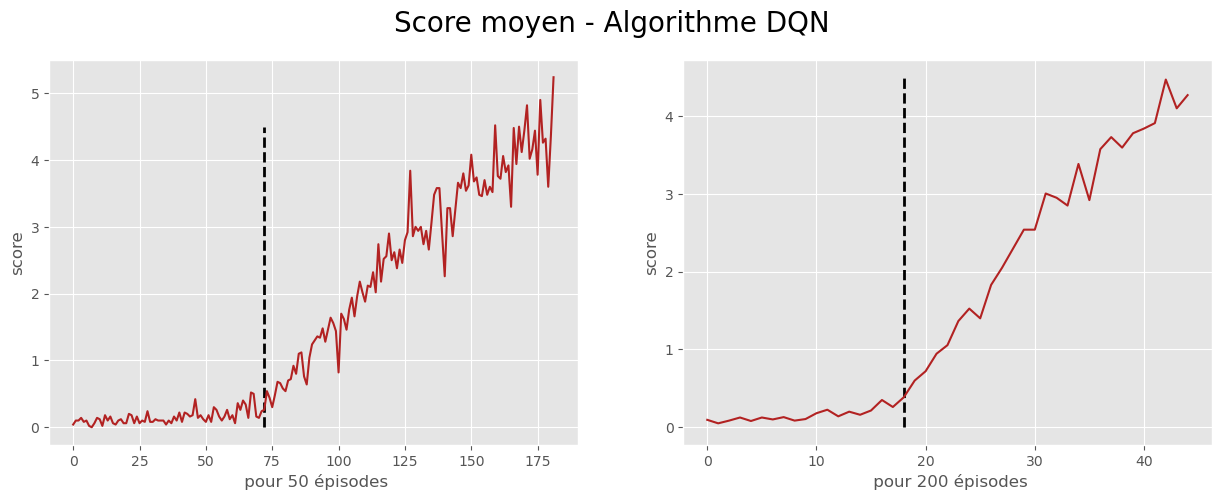

In [4]:
# Moyenne sur K épisodes : 
n=len(scores)

listK=[50,200]
plt.figure(figsize=(15.,5.))
plt.suptitle('Score moyen - Algorithme DQN',fontsize=20)
for i,k in enumerate(listK):
    plt.subplot(1,2,i+1)
    if i==0:
        #plt.plot([152,152],[0,4.5],'--',color='black',linewidth=2)
        plt.plot([72,72],[0,4.5],'--',color='black',linewidth=2)
    else:
        #plt.plot([38,38],[0,4.5],'--',color='black',linewidth=2)
        plt.plot([18,18],[0,4.5],'--',color='black',linewidth=2)
    
    N=n//k
    moy=list()
    for p in range(N):
        moy.append(np.mean(scores[p*k:(p+1)*k]))

    plt.plot(moy,color='firebrick')
    plt.xlabel(' pour '+str(k)+' épisodes')
    plt.ylabel('score')

In [24]:
'''Première phase '''
scores_1=np.array(scores[0:3601])

print("Pourcentage de score nul : "+str(int(np.mean(scores_1==0)*100))+"%")
print("Score moyen : "+str(np.mean(scores_1)))

Pourcentage de score nul : 86%
Score moyen : 0.15051374618161623


In [31]:
'''Deuxième phase'''
scores_2=np.array(scores[3601:])


print("Pourcentage de score nul : "+str(int(np.mean(scores_2>0)*100))+"%")
print("Score moyen : "+str(np.mean(scores_2)))
print("Score moyen à la fin de la deuxième phase :" + str(np.mean(scores_2[range(-50,0)])))
print("Score moyen au début de la deuxième phase :" + str(np.mean(scores_2[range(0,50)])))

Pourcentage de score nul : 86%
Score moyen : 2.6261952011546095
Score moyen à la fin de la deuxième phase :3.8
Score moyen au début de la deuxième phase :0.26


In [32]:
len(scores_2)

5543

In [9]:
total_scores = np.cumsum(scores)

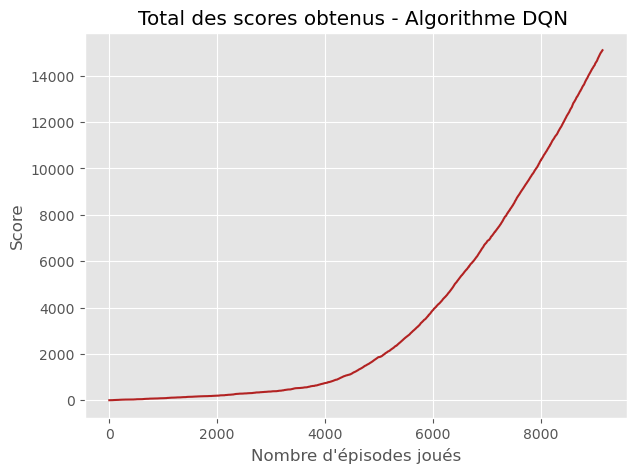

In [6]:
# Max scores et total scores 
plt.figure(figsize=(7.,5.))

plt.plot(total_scores,color='firebrick')
plt.title('Total des scores obtenus - Algorithme DQN ')
plt.ylabel('Score')
plt.xlabel('Nombre d\'épisodes joués')

plt.show()

In [7]:
np.mean(scores)

1.651246719160105